#  Analysis of Network Topologies

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

## Network Size

The size of a network is characterized by the numbers of nodes and edges in it.

In [2]:
g = nx.karate_club_graph()
g.number_of_nodes()

34

In [3]:
g.number_of_edges()

78

The density of a network is the fraction between 0 and 1 that tells us what portion of all possible edges are actually realized in the network. For a network $G$ made of $n$ nodes and $m$ edges, the density $\rho(G)$ is given by

- an undirected network
$$\rho(G) = \frac{m}{\frac{n(n-1)}{2}} = \frac{2m}{n(n-1)}$$

- a directed network 
$$\rho(G) = \frac{m}{n(n-1)}$$

In [4]:
g = nx.karate_club_graph()
nx.density(g)

0.13903743315508021

In [8]:
n = g.number_of_nodes()
m = g.number_of_edges()

rho = 2*m / (n*(n-1))
rho

0.13903743315508021

## Network Percolation

The size and density can still predict about networks. One such example is network percolation.

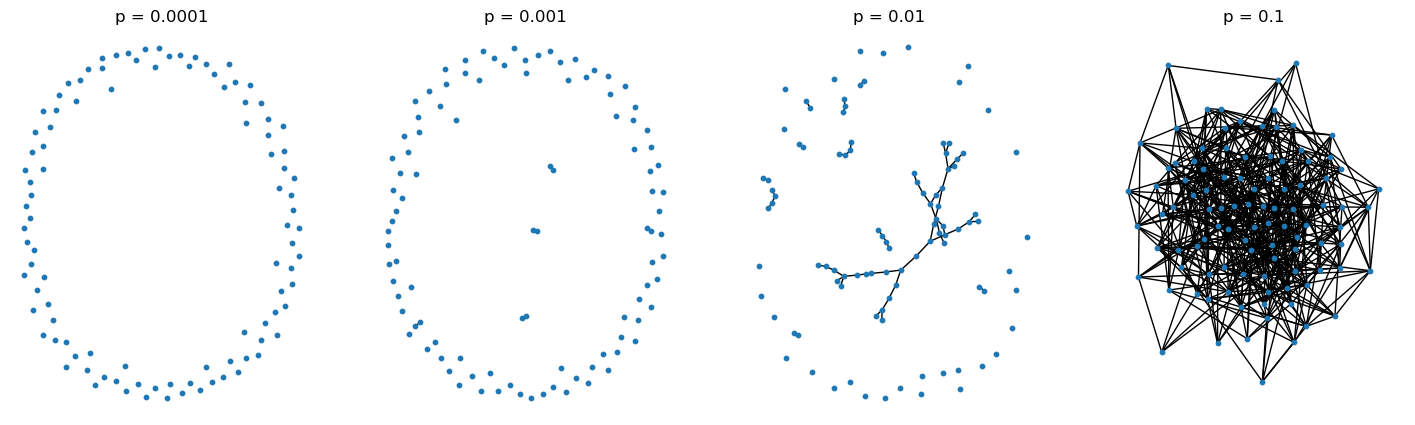

In [15]:
plt.figure(figsize=(18, 5))
for i, p in [(1, 0.0001), (2, 0.001), (3, 0.01), (4, 0.1)]:
    plt.subplot(1, 4, i)
    plt.title('p = ' + str(p))
    g = nx.erdos_renyi_graph(100, p)
    nx.draw(g, node_size = 10)

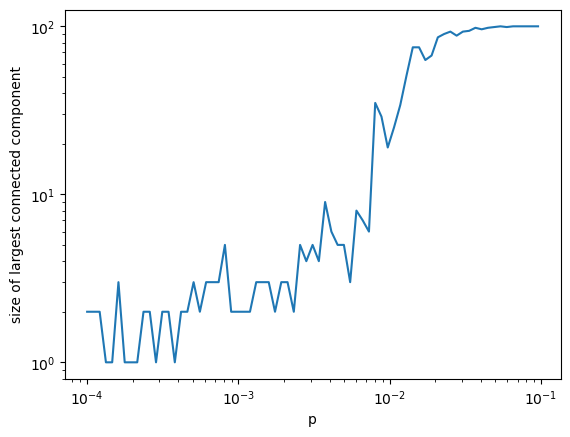

In [16]:
p = 0.0001
pdata = []
gdata = []

while p < 0.1:
    pdata.append(p)
    g = nx.erdos_renyi_graph(100, p)
    ccs = nx.connected_components(g)
    gdata.append(max(len(cc) for cc in ccs))
    p *= 1.1
    
plt.loglog(pdata, gdata)
plt.xlabel('p')
plt.ylabel('size of largest connected component')
plt.show()